<a href="https://colab.research.google.com/github/Devu-Goyal/NLP-Project-Round-1/blob/main/Project_Round1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
file = open(r"stained_glass_windows.txt", encoding='utf-8')
# for preventing next line space
wordList = file.read().splitlines() 
text1 = ""
text1 = text1.join(wordList)

In [3]:
len(text1) #checking if taken input is large enough

74015

In [4]:
# for removing panctuations
punct = '''!()[]{}-+/*=|\/?.,><:;""@#$%^&~`_'''
cleantxt = ""
for i in text1:
  if i not in punct:
    cleantxt = cleantxt + i

In [5]:
#for converting text in lowercase
text1 = cleantxt
text1 = text1.lower()

In [6]:
# for removing numbers
text1 = re.sub(r'\d+','',text1) 
text1[:2000]

'the project gutenberg ebook of stained glass windows by williamfrederic faberthis ebook is for the use of anyone anywhere in the united states andmost other parts of the world at no cost and with almost no restrictionswhatsoever you may copy it give it away or reuse it under the termsof the project gutenberg license included with this ebook or online atwwwgutenbergorg if you are not located in the united states youwill have to check the laws of the country where you are located beforeusing this ebookthe first edition of the report on stained glass windows for gracechurch lockport which appeared in january  is now exhaustedas there is a constant demand for it a second is deemed necessary andthe occasion seemed favorable for a little further talk about windowsand glass hence this pamphletthe project of four years ago is no longer an insubstantial dreamsince that time eleven windows and three mosaics have been placed ingrace church in them all the adopted scheme has been followed withres

In [7]:
# for removing white-spaces
def del_whitespace(text1):
  return " ".join(text1.split())
del_whitespace(text1)

"the project gutenberg ebook of stained glass windows by williamfrederic faberthis ebook is for the use of anyone anywhere in the united states andmost other parts of the world at no cost and with almost no restrictionswhatsoever you may copy it give it away or reuse it under the termsof the project gutenberg license included with this ebook or online atwwwgutenbergorg if you are not located in the united states youwill have to check the laws of the country where you are located beforeusing this ebookthe first edition of the report on stained glass windows for gracechurch lockport which appeared in january is now exhaustedas there is a constant demand for it a second is deemed necessary andthe occasion seemed favorable for a little further talk about windowsand glass hence this pamphletthe project of four years ago is no longer an insubstantial dreamsince that time eleven windows and three mosaics have been placed ingrace church in them all the adopted scheme has been followed withresu

In [8]:
# lemmetisation of text
lemmatizer = WordNetLemmatizer()
def lemmatize (text):
  wrd_token = word_tokenize(text)
  # for providing context
  lemma = [lemmatizer.lemmatize(word, pos='v') for word in wrd_token]
  return lemma

lemmatize(text1)

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'stain',
 'glass',
 'windows',
 'by',
 'williamfrederic',
 'faberthis',
 'ebook',
 'be',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'unite',
 'state',
 'andmost',
 'other',
 'part',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictionswhatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 'reuse',
 'it',
 'under',
 'the',
 'termsof',
 'the',
 'project',
 'gutenberg',
 'license',
 'include',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'atwwwgutenbergorg',
 'if',
 'you',
 'be',
 'not',
 'locate',
 'in',
 'the',
 'unite',
 'state',
 'youwill',
 'have',
 'to',
 'check',
 'the',
 'laws',
 'of',
 'the',
 'country',
 'where',
 'you',
 'be',
 'locate',
 'beforeusing',
 'this',
 'ebookthe',
 'first',
 'edition',
 'of',
 'the',
 'report',
 'on',
 'stain',
 'glass',
 'windows',
 'for',
 'gracechurch',
 'lockport',
 'which',
 'appear',
 'in',
 'janua

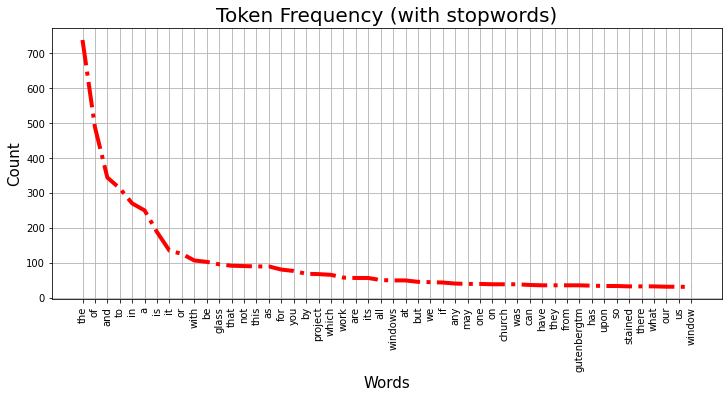

In [10]:
tokens = word_tokenize(text1)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:50]
y = list(freq.values())[:50]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (with stopwords)',size=20)
plt.xlabel('Words',size=15)
plt.ylabel('Count',size=15)
plt.show()

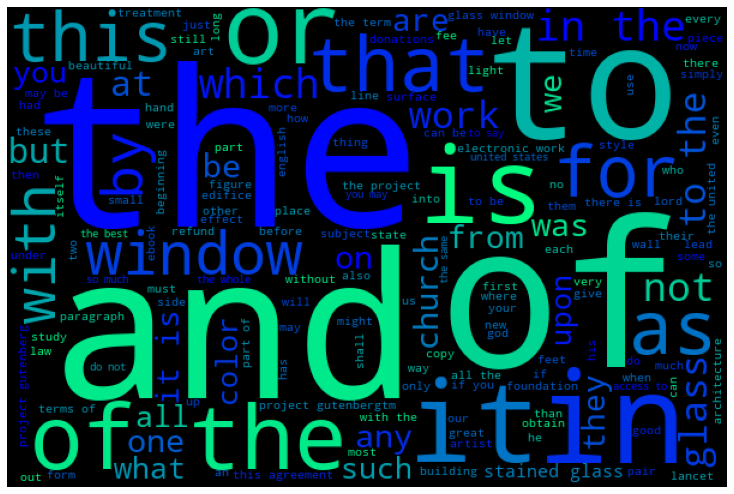

In [11]:
#wordcloud with stopwords
wordcloud = WordCloud(width = 600, height = 400, background_color ='black', min_font_size = 8,stopwords = {},colormap='winter').generate(text1) 
plt.figure(figsize = (10,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [12]:
# Removing stopwords
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text1)
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
finaltext = "  "
finaltext = finaltext.join(tokens_final)
text1 = finaltext


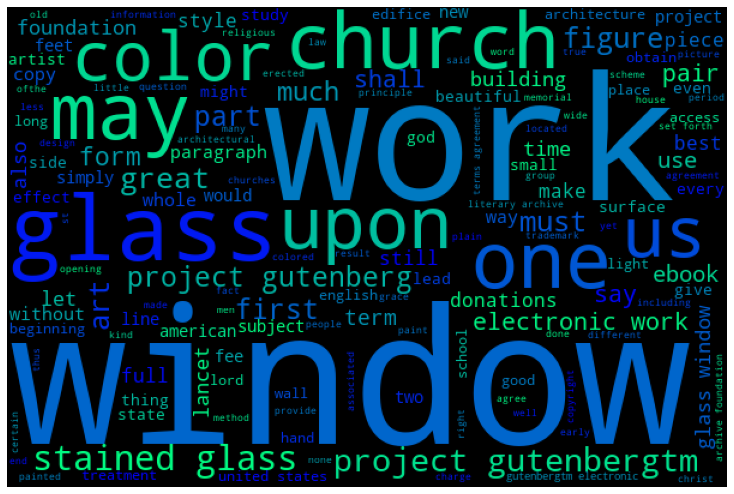

In [19]:
# Word cloud after removing stopwords
wordcloud = WordCloud(width = 600, height = 400, background_color ='black', min_font_size = 8,stopwords = {},colormap='winter').generate(text1) 
plt.figure(figsize = (10,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

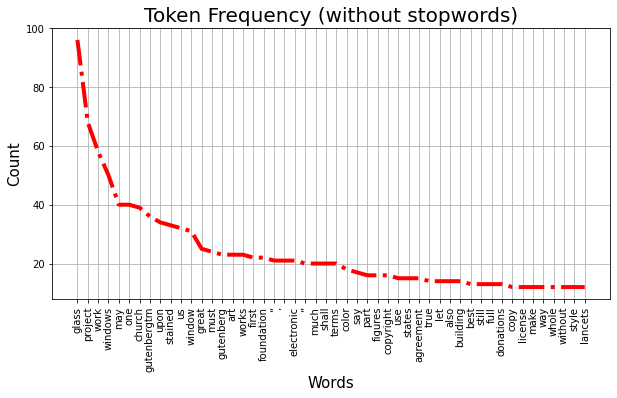

In [14]:
tokens = word_tokenize(text1)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:50]
y = list(freq.values())[:50]
plt.figure(figsize=(10,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (without stopwords)',size=20)
plt.xlabel('Words',size=15)
plt.ylabel('Count',size=15)
plt.show()

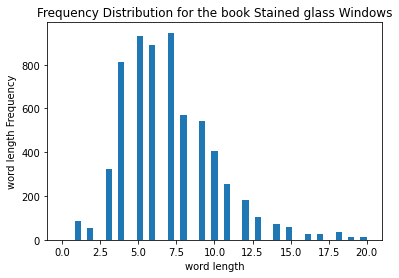

In [20]:
import numpy as np
bin_size=np.linspace(0,20)
wordLength = [len(r) for r in tokens]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength, bins=bin_size)
plt.xlabel('word length')
plt.ylabel('word length Frequency')
plt.title('Frequency Distribution for the book Stained glass Windows')
plt.show()

In [21]:
tagged = nltk.pos_tag(tokens) 
tagged[:50] #first 50 POS tags

[('project', 'NN'),
 ('gutenberg', 'NN'),
 ('ebook', 'NN'),
 ('stained', 'VBD'),
 ('glass', 'NN'),
 ('windows', 'NNS'),
 ('williamfrederic', 'VBP'),
 ('faberthis', 'JJ'),
 ('ebook', 'NN'),
 ('use', 'NN'),
 ('anyone', 'NN'),
 ('anywhere', 'RB'),
 ('united', 'JJ'),
 ('states', 'NNS'),
 ('andmost', 'VBD'),
 ('parts', 'NNS'),
 ('world', 'NN'),
 ('cost', 'NN'),
 ('almost', 'RB'),
 ('restrictionswhatsoever', 'NN'),
 ('may', 'MD'),
 ('copy', 'VB'),
 ('give', 'VB'),
 ('away', 'RP'),
 ('reuse', 'NN'),
 ('termsof', 'NN'),
 ('project', 'NN'),
 ('gutenberg', 'NN'),
 ('license', 'NN'),
 ('included', 'VBD'),
 ('ebook', 'JJ'),
 ('online', 'NN'),
 ('atwwwgutenbergorg', 'NN'),
 ('located', 'VBN'),
 ('united', 'JJ'),
 ('states', 'NNS'),
 ('youwill', 'RB'),
 ('check', 'VBP'),
 ('laws', 'NNS'),
 ('country', 'NN'),
 ('located', 'VBD'),
 ('beforeusing', 'VBG'),
 ('ebookthe', 'NN'),
 ('first', 'JJ'),
 ('edition', 'NN'),
 ('report', 'NN'),
 ('stained', 'VBD'),
 ('glass', 'NN'),
 ('windows', 'NNS'),
 ('gracech

In [17]:
from collections import Counter
counts = Counter( tag for word,  tag in tagged)
print(counts)

Counter({'NN': 2226, 'JJ': 1244, 'NNS': 674, 'RB': 419, 'VBP': 300, 'VBD': 282, 'VBG': 242, 'VBN': 188, 'VB': 167, 'IN': 129, 'VBZ': 117, 'MD': 112, 'CD': 75, 'NNP': 43, 'PRP': 32, 'JJS': 32, 'JJR': 23, 'RBR': 16, 'DT': 13, 'RP': 8, 'WP': 8, 'POS': 5, 'WDT': 4, 'FW': 3, 'WP$': 1, 'EX': 1, 'RBS': 1, "''": 1, 'CC': 1})


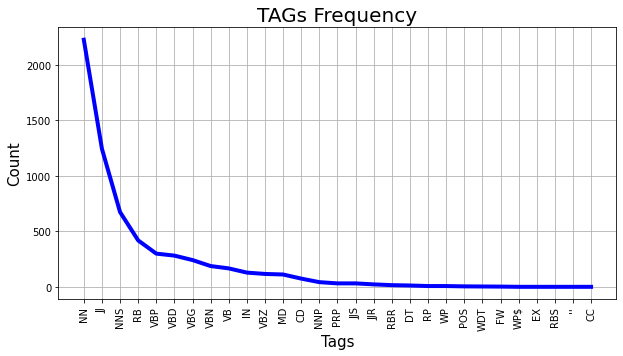

In [18]:
freq_tags = nltk.FreqDist(counts)
freq_tags = {k: v for k, v in sorted(freq_tags.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_tags.keys())[:50]
y = list(freq_tags.values())[:50]
plt.figure(figsize=(10,5))
plt.plot(x,y,c='b',lw=4,ls='-')
plt.grid()
plt.xticks(rotation=90)
plt.title('TAGs Frequency',size=20)
plt.xlabel('Tags',size=15)
plt.ylabel('Count',size=15)
plt.show()